In this notebook, we explore the insights we can leverage to calculate the speed of each vehicle.

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
f = open("/code/data/datasets/common_hall/tracking_outputs/framewise_aggregation.json")
frame_to_predictions_map = json.load(f)
f = open("/code/data/datasets/common_hall/tracking_outputs/objectwise_aggregation.json")
objects_to_predictions_map = json.load(f)['annotations'] #the object_id attribute of frame_to_predictions_map are the keys of object_to_predictions_map

In [11]:
#get all the backtire keypoints for object 0
object_0_start, object_0_end = objects_to_predictions_map[3]['segments'][0]


In [12]:
object_0_back_tires = []
object_0_front_tires = []
for frame_idx in range(object_0_start, object_0_end):
    object_0_back_tires.append(frame_to_predictions_map[frame_idx]['annotations'][0]['keypoints'][0])#zeros have nothing to do with object index
    object_0_front_tires.append(frame_to_predictions_map[frame_idx]['annotations'][0]['keypoints'][1])

In [13]:
img = cv2.imread('/code/data/datasets/images/WBuBqS9h8_216.jpg')
# plt.figure()
# plt.imshow(img)

In [14]:
def draw_poly(_img, _pts, _color):
    pts = _pts
    pts = pts.reshape((-1, 1, 2))
    
    isClosed = False
    
    # Blue color in BGR
    color = _color
    
    # Line thickness of 2 px
    thickness = 2
    
    # Using cv2.polylines() method
    # Draw a Blue polygon with
    # thickness of 1 px
    return cv2.polylines(_img, [pts],
                        isClosed, color, thickness)


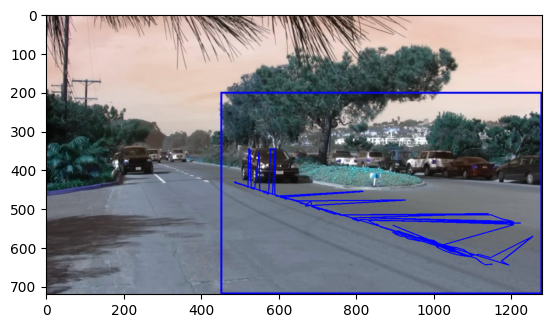

In [15]:
back = draw_poly(img, np.array(object_0_back_tires).astype(int), (0, 0, 255))
plt.figure()
plt.imshow(back)

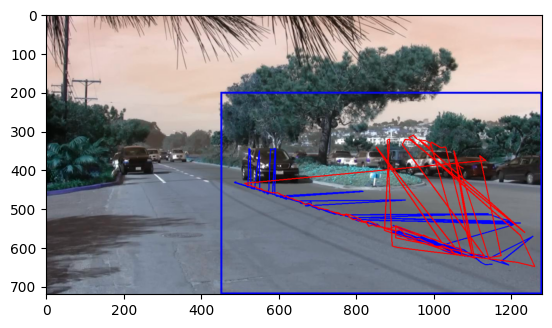

In [16]:
front = draw_poly(back, np.array(object_0_front_tires).astype(int),(255, 0, 0))
plt.figure()
plt.imshow(front)